# Hackathon Santander Data Challenge 

<img src="LOGO.png" width="600" height="400">

### 1. Introdução

Pequenas e médias empresas brasileiras sabem que inovar é imprescindível para seu funcionamento e permanência no mercado. Isso é o que mostra o resultado da pesquisa do Comitê Inovação nas Pequenas e Médias Empresas (PME) da Associação Nacional de Pesquisa, Desenvolvimento e Engenharia das Empresas Inovadoras (Anpei).

Com o início da pandemia, as preferências sobre o consumo de determinados serviços e produtos mudou. O número de proprietários de pequenas e médias empresas fechando as portas é grande e ainda vai aumentar. Uma inovação bem-sucedida pode representar melhor posicionamento no mercado (ou em alguns casos, a liderança) e até mesmo a sobrevivência de uma empresa.

<img src="https://blog.formaciongerencial.com/wp-content/uploads/2015/07/habilidades-valoradas-empleadores-linkedin.jpg" width="600" height="400">


### 2. Sobre a nossa solução

A nossa solução visa ajudar as pequenas e médias empresas a criar novas experiências de consumo e estimular o comércio com base nas tendências de busca dos usuários. Entre as empresas mais afetadas pela pandemia estão aquelas que não conseguem implementar o uso da tecnologia em seus produtos. O e-commerce é uma solução para a transformação digital e aumentar a venda de seus produtos, porém, ainda há dificuldades em implementa-lo, principalmente quando relacionado ao custo. Então, como podemos ajudar as pequenas e médias empresas a compreenderem seus produtos sem ela ter os dados de consumo de seus clientes?

Nossa solução foca em extrair dados de plataformas do Google (como Google Trends e Google Shopping) para ajudar essas empresas a criarem novas modalidades de consumo, aprimorarem seus produtos e selecionar a melhor opção para seus clientes. Essa análise leva em conta os produtos mais buscado pelas pessoas, informando ao empreendedor se pode ou não ser viável o aumento de estoque de sua loja, seja física ou virtual. O objetivo é usar a inteligência de dados para trazer uma experiência para aqueles que ainda não podem usufrir delas. 

Aqui, vamos demonstrar como é importante analisar os dados de seus produtos e fazer a melhor escolha na hora de renovar o seu estoque. 


#### Motivação

 
**"Segundo uma pesquisa realizada pela Confederação Nacional de Dirigentes Lojistas (CNDL) e pelo Serviço de Proteção ao Crédito (SPC Brasil) para investigar o perfil e os hábitos de compra de consumidores digitais das 27 capitais brasileiras indica que 97% buscam informações na internet antes de comprar em lojas físicas."**

https://www.ecommercebrasil.com.br/noticias/97-dos-internautas-buscam-informacoes-online/

Nossa motivação está em aproveitar isso os dados de busca de informações na internet para determinar o que pode ou não acontecer em um período futuro. Dessa forma, podemos entender como as pessoas se comportam e quais são as novas tendências que estão surgindo. Em época de pandemia, o medo faz as pessoas mudarem seus hábitos e a busca por entender o comportamento delas pode ajudar as pequenas e médias empresas a se erguerem e criar novas soluções para seus produtos. 

<img src="https://googlediscovery.com/wp-content/uploads/google-shopping.jpg">

### 3. Bibliotecas utilizadas para implementação da solução

Segue abaixo uma lista dos recursos que utilizamos para elaborar esta solução:
- pandas: https://pandas.pydata.org/
- pytrends: https://matplotlib.org/
- matplotlib: https://matplotlib.org/
- statsmodels: https://www.statsmodels.org/stable/index.html
- numpy: https://numpy.org/

In [47]:
import pandas as pd                        
from pytrends.request import TrendReq
from pylab import rcParams
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

plt.rcParams.update({'font.size': 9})

sns.set(style="darkgrid")

pytrend = TrendReq()

### 4. Preparação e coleta de dados (Google Trends)

Nessa parte iremos demonstrar como nós coletamos os dados e preparamos eles para treinar com um modelo de aprendizado de máquina para identificar tendências. Primeiro, a função *get_google_trends_data* é responsável por coletar todos os dados de pesquisa dos produtos que quer comparar.  Nela, você pode escolher uma data inicial e uma data final para analisar e uma lista de palavras-chave.

A lista de produtos foi escolhida com base na seguinte análise:

<img src="ecommerce.jpeg">
Vamos fazer uma busca de exemplo para ajudar:

- lista de produtos: **alcool em gel, desinfetante, agua sanitaria**
- País: **Brazil**
- Estado: **Todos**
- Data inicial: **01/jan/2014**
- Data final: **01/ago/2020**


#### O que mais pode ser buscado?

A busca aqui é livre, você pode tanto procurar um item mais geral, como **agua sanitária**, ou items mais específicos, como um produto para cabelo de qualquer marca que desejar. Os filtros também permitem separar por região, basta você colocar a sigla da sua região para que a busca possa ser feita na ferramenta. Por enquanto, selecionamos por padrão apenas as pesquisas realizadas no Brasil, mas você pode modificar isso digitando a sigla do país que deseja comparar. 

#### Os parâmetros possíveis são:

- **list_product**: você passa uma lista de produtos como ["creme capilar", "sabonete lavanda"];
- **time_start**: data inicial para analisar;
- **time_end**: data final para analisar;
- **state**: escolha o estado que desejar ou deixe em branco caso queira algo mais geral. Exemplo: SP (para São Paulo), RJ (para Rio de Janeiro), entre outros;
- **country**: selecione o país desejado;

##### Chamando a função para obter os dados no jupyter notebook:

*get_google_trends_data(list_product=['creme capila', 'sabonete lavanda'],
                       time_start='2014-01-01',
                       time_end='2020-01-01',
                       country='BR',
                       state='SP')*


In [48]:
exemplos = {'beleza': ["mascara capilar l'oreal", "colonia johnsons baby"],
            'sanitario': ["alcool em gel", "desinfetante", "agua sanitaria"],
            'bebidas': ["vinho tinto", "vinho branco"]}

def get_google_trends_data(list_product, time_start, time_end, state=None, country='BR'):
    if state:
        sigla='{}-{}'.format(country, state)
    else:
        sigla='{}'.format(country)
    
    data_composer = '{} {}'.format(time_start, time_end)
    pytrend.build_payload(kw_list=list_product, 
                                  geo=sigla, 
                                  cat=0,
                                  timeframe=data_composer)
    
    return pytrend.interest_over_time()

list_product=exemplos['sanitario']

#### baixando os dados do Google Trends

In [49]:
dataset = get_google_trends_data(list_product=list_product, 
                            time_start='2014-01-01',
                            time_end='2020-08-01')

### 5. Uma demonstração dos dados coletados

Em cada coluna temos as palavras chave que buscamos e a frequência de busca naquela determinada data

In [50]:
def export_data_csv(dataset, save_output):
    dataset.to_csv(save_output, sep=",") 
    
del dataset['isPartial']
dataset.style.background_gradient(cmap='Greens')

,alcool em gel,desinfetante,agua sanitaria
date,,,
2014-01-01 00:00:00,0,2,4
2014-02-01 00:00:00,1,2,4
2014-03-01 00:00:00,0,2,4
2014-04-01 00:00:00,1,2,3
2014-05-01 00:00:00,1,2,3
2014-06-01 00:00:00,0,2,3
2014-07-01 00:00:00,1,2,4
2014-08-01 00:00:00,0,2,3
2014-09-01 00:00:00,1,3,4


#### Detalhes da nossa base

Vamos conhecer um pouco da nossa base, para isso utilizamos a função describe do pandas. Ela retorna dados estatísticos para todas as colunas do nosso dataset. Essa checkagem inicial é bastante proveitosa para entendermos como a nossa base está composta. Basicamente, temos uma série temporal, onde o index são as datas de coleta e as colunas representam a frequência de busca de cada produto no Google.

In [51]:
describe = dataset.describe()
describe.style.background_gradient(cmap='Greens')

,alcool em gel,desinfetante,agua sanitaria
count,79.000000,79.000000,79.000000
mean,2.936709,4.569620,5.417722
std,11.508460,2.257089,2.463100
min,0.000000,2.000000,3.000000
25%,1.000000,3.000000,4.500000
50%,1.000000,4.000000,5.000000
75%,1.000000,5.000000,5.000000
max,100.000000,14.000000,17.000000


### 6. Verificando se existe algum valor nulo nas tabelas

É importante verificar a existência de linhas nulas, pois elas podem atrabalhar a nossa análise. Por isso, essa verificação deve retornar em cada uma das colunas a quantidade de itens nulos. Como as bases são baixadas direto do Google Trends, valores nulos são bem raros, já que eles salvam uma estatistica de busca quase em tempo real.

In [52]:
dataset.isnull().sum()

alcool em gel     0
desinfetante      0
agua sanitaria    0
dtype: int64

In [53]:
def show_point_compare(df):
    plt.figure(figsize=(15, 6))
    for col in df.columns:
        plt.plot(df.index, df[col], '--')

    plt.title("Busca por produtos")
    plt.legend(df.columns)
    plt.xlabel("data")
    plt.ylabel("frequencia")
    plt.grid("b--")
    plt.show() 

### 7. Uma amostra dos dados coletados:

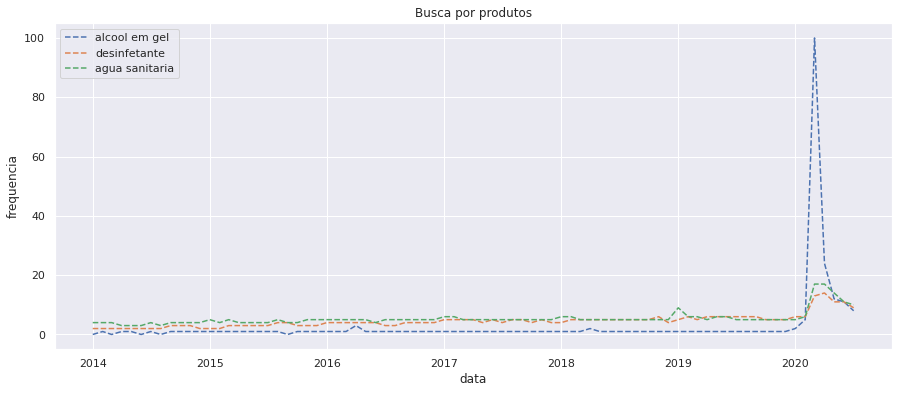

In [54]:
show_point_compare(dataset)

### 8. Uma busca por anos de cada produto: 

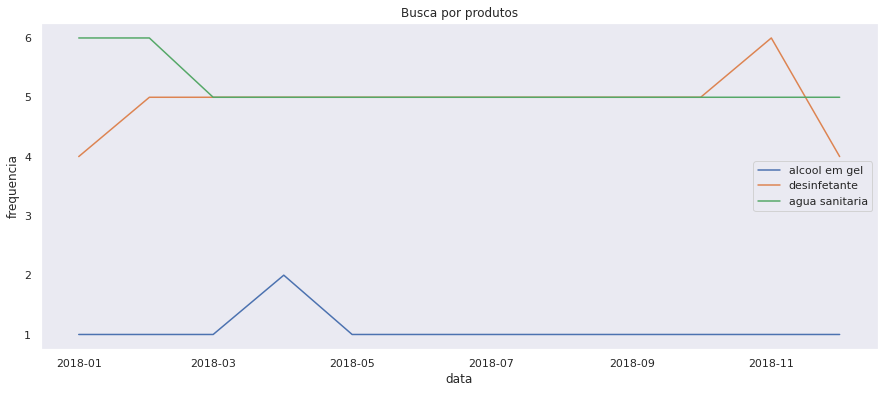

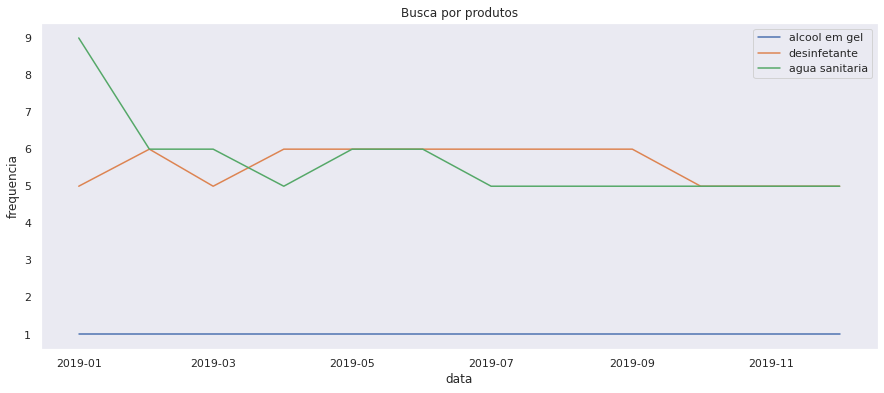

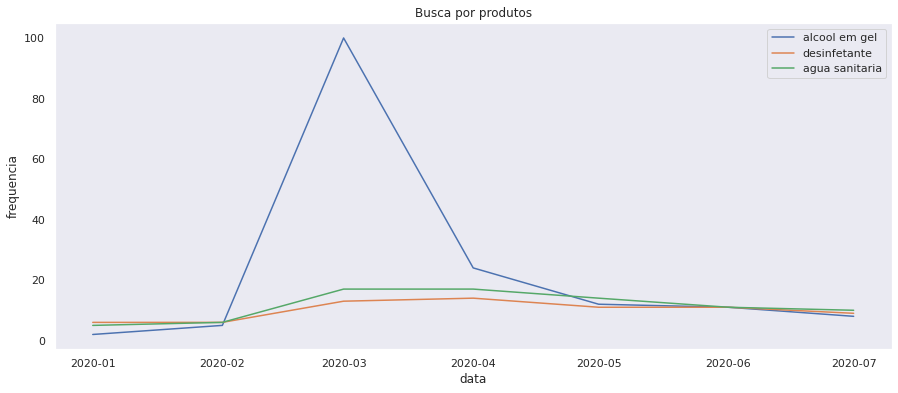

In [55]:
def show_line_compare(df):
    plt.figure(figsize=(15, 6))
    for col in df.columns:
        plt.plot(df.index, df[col])

    plt.title("Busca por produtos")
    plt.legend(df.columns)
    plt.xlabel("data")
    plt.ylabel("frequencia")
    plt.grid()
    plt.show() 
    
def get_media_year(ano):
    y_index = dataset[ano]
    show_line_compare(y_index)
    
get_media_year("2018")
get_media_year("2019")
get_media_year("2020")

### 9. Qual produto teve mais interesse dos usuarios?

Essa parte pode nos ajudar a comparar dois ou mais produtos distintos, fornecendo gráficos comparativos com base na busca de usuários do Google. Além disso, podemos comparar também anos distintos, fornecendo ainda mais detalhes sobre a lista de produtos.

In [56]:
import matplotlib.colors as mcolors
def frequency_total(ano=None):
    plt.figure(figsize=(15, 6))
    if ano:
        title=f"Comparacao de produtos por busca-{ano}"
        yi = dataset[ano]
        produtos_sum = yi.sum()
        plt.pie(produtos_sum, labels=list_product, 
                 autopct='%1.1f%%', startangle=90, pctdistance=0.85, 
                shadow=True)
        centre_circle = plt.Circle((0,0),0.65,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.axis('equal') 
        plt.tight_layout()

    else:
        explode = (0, 0.1, 0)
        produtos_sum = dataset.sum()
        title=f"Comparacao de produtos por busca"
        plt.pie(produtos_sum, labels=list_product, 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)
        centre_circle = plt.Circle((0,0),0.65,fc='white')
        fig = plt.gcf() 
        fig.gca().add_artist(centre_circle)
        plt.axis('equal')
        plt.tight_layout()
    
    plt.axis('equal')  
    plt.title(title)
    plt.show()
    

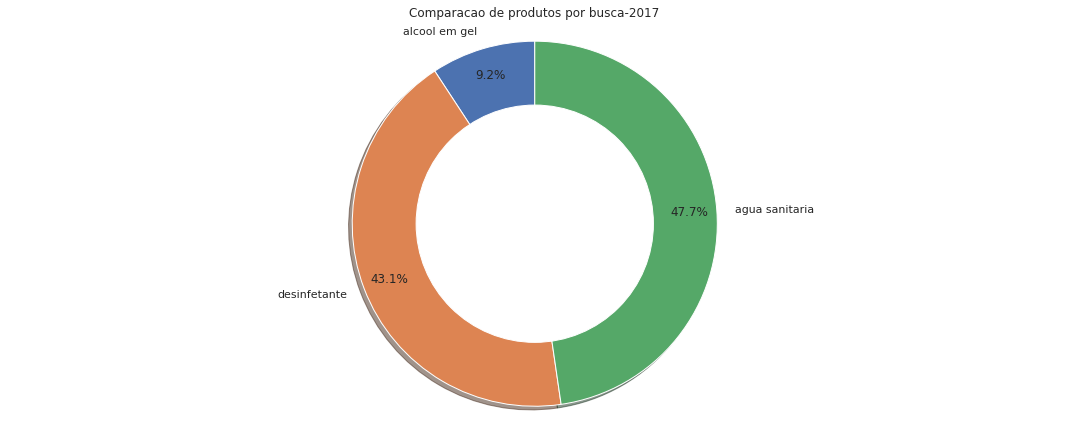

In [57]:
frequency_total("2017")

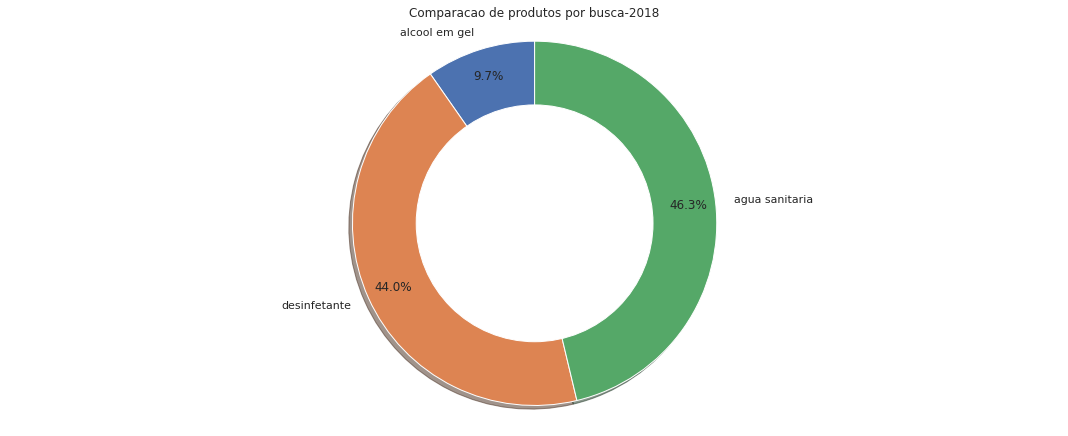

In [58]:
frequency_total("2018")

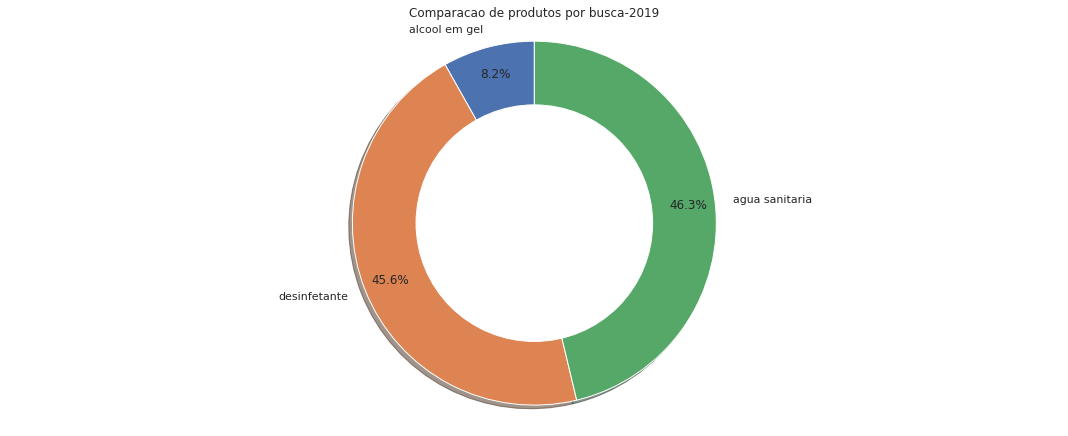

In [59]:
frequency_total("2019")

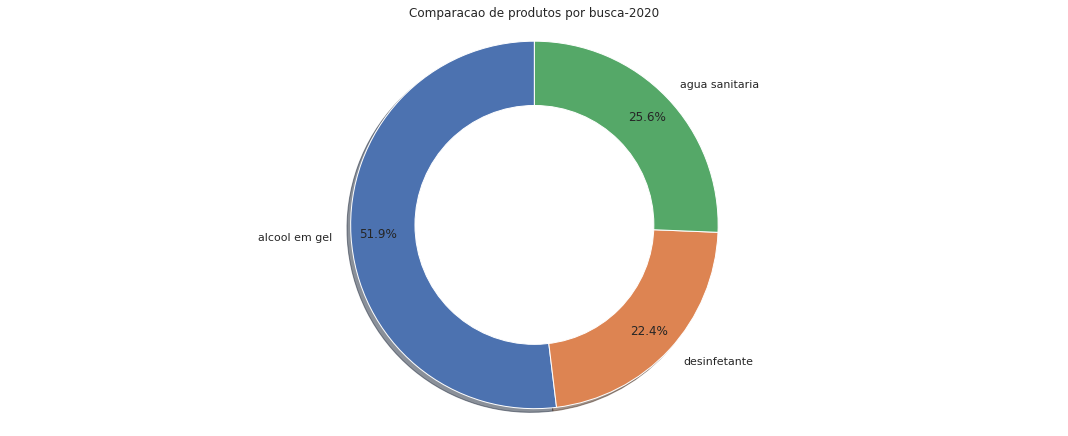

In [60]:
frequency_total("2020")

### 10. Como construímos um modelo para prever tendências?

#### O que é uma tendência?
Por definição, tendência é aquilo que leva alguém a seguir um determinado caminho ou a agir de certa forma; predisposição, propensão.

#### É possível encontrar tendência nos dados?
Com uma boa análise de dados, é possível extrair tendências interessantes que indiquem um comportamento, um padrão. Isso pode ajudar as pessoas a tomarem decisões. Nessa solução, analisamos tendências de busca para tentar prever um comportamento, ou seja, quando um determinado produto está subindo ou caindo no interesse do público, isso somente olhando as buscas do Google.

#### Por que o Google trends?
Milhares de pessoas fazem buscas no Google, seja para procurar um produto, algum amigo, imagens para um slide. Com o Google Trends não ficamos limitados a dados locais, já que os dados do Google são atualizados periodicamente, o que nos permite elaborar análises automáticas com o passar do tempo, sem qualquer interferência ou seleção de um novo dataset.

#### Por que o Google Shopping?
Também utilizamos dados do Google shopping para extrair dados de um determinado produto. Isso irá ajudar a pequena e média empresa a entender mais sobre o seu produto. Com isso, retornamos para o usuário o preço médio do produto que ele deseja e a avaliação dos usuários. Dessa maneira ele pode se basear nesses dados para elaborar como ele irá vender o seu produto comparando com outros que estão vendendo o mesmo produto.


#### Qual modelo utilizamos para prever as 'tendências'?
Para prever futuras quedas ou aumento de buscas de um produto, utilizamos o modelo SARIMAX. SARIMAX é um modelo estatístico muito utilizado em séries temporais, que é o nosso caso. SARIMAX já foi utilizado para vários fins, bem comum no mercado financeiro para previsão de inflação.

Caso queira saber mais sobre o SARIMAX, separamos um artigo científico bem interessante sobre:
https://www.researchgate.net/publication/313251716_Modelling_the_demand_for_cement_The_case_of_Poland_and_Spain


#### Sobre a biblioteca statsmodels do Python:

statsmodels é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e a exploração de dados estatísticos. Uma extensa lista de estatísticas de resultados está disponível para cada estimador. Os resultados são testados em relação aos pacotes estatísticos existentes para garantir que eles estejam corretos.

https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

### 11 Treinando o modelo 

Aqui nós utilizamos a função **seasonal decompose** para mostrar os gráficos em 4 categorias (Observado, Tendência, Sazonal, Residual) com base nos produtos selecionados:

parâmetro de frequência:
- period = 365, para tendências do ano
- period = 30, para tendências do mes
- period = 7, para tendências da semana

****************************************************************************************************


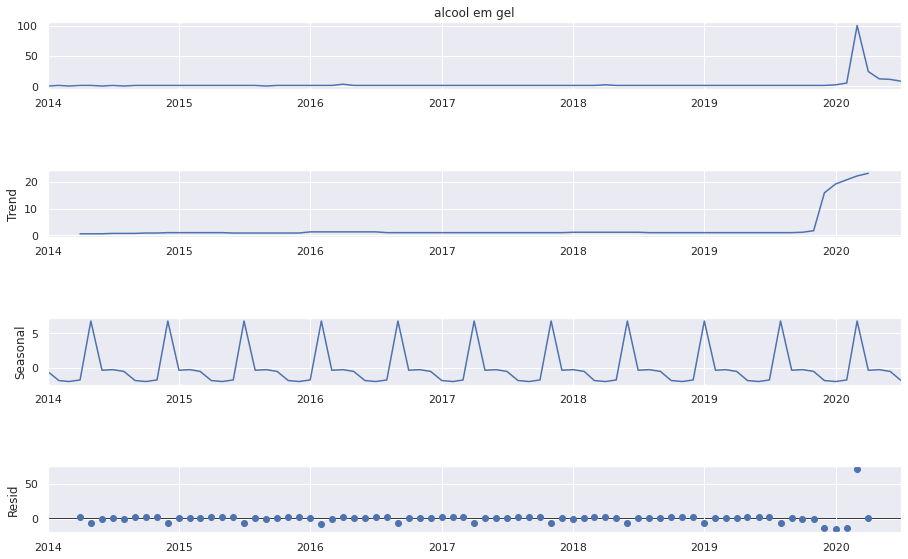

****************************************************************************************************


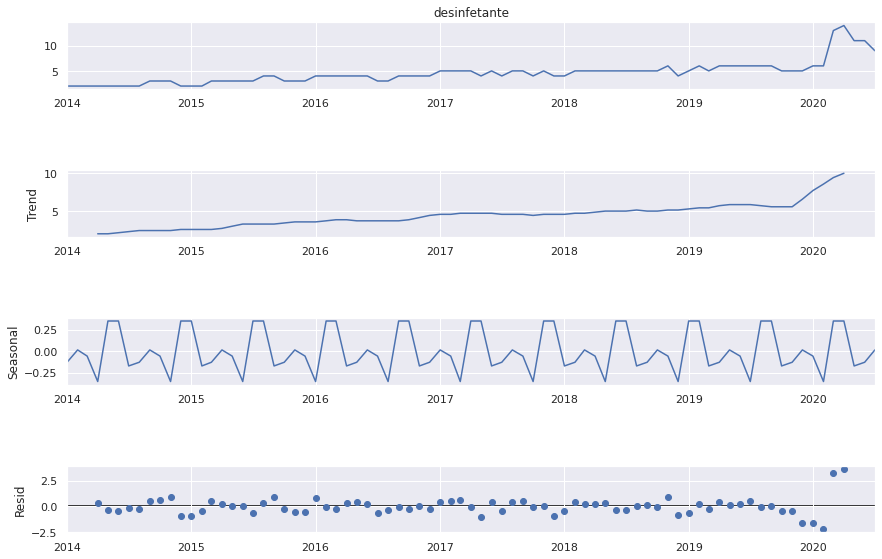

****************************************************************************************************


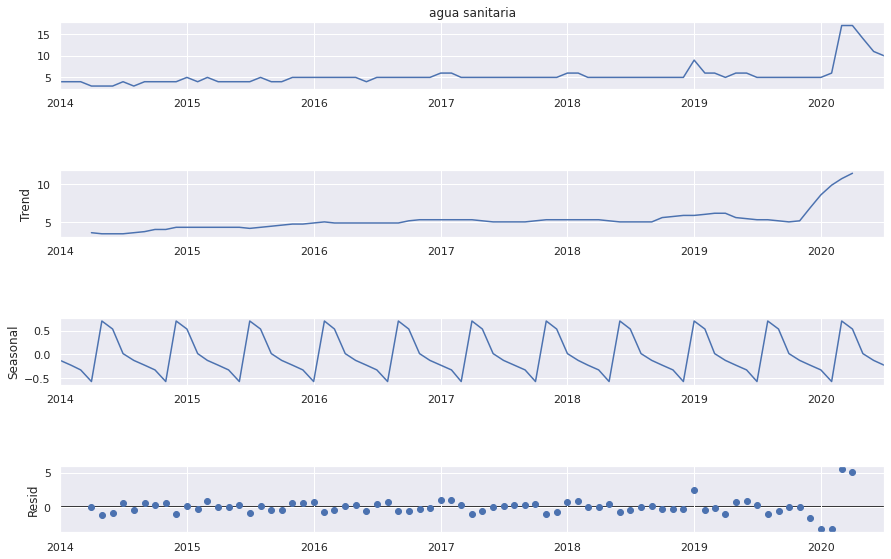

In [61]:
for col in dataset.columns:
    print("*" * 100)
    frequencia = 7
    result = sm.tsa.seasonal_decompose(dataset[col].dropna(),
                                        period=frequencia)
    fig = result.plot()
    fig.set_figheight(9)
    fig.set_figwidth(14)
    plt.show()

Training SARIMAX model ... product: alcool em gel
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1838      0.984      0.187      0.852      -1.744       2.111
ma.L1         -0.9168      0.745     -1.231      0.218      -2.376       0.542
ar.S.L12   -6.851e-05     19.307  -3.55e-06      1.000     -37.841      37.841
sigma2       181.7743     10.438     17.414      0.000     161.316     202.233
Training SARIMAX model ... product: desinfetante
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5841      0.299      1.954      0.051      -0.002       1.170
ma.L1         -0.8606      0.247     -3.482      0.000      -1.345      -0.376
ar.S.L12      -0.7023      0.526     -1.334      0.182      -1.734       0.329
sigma2         1.5503      0.210

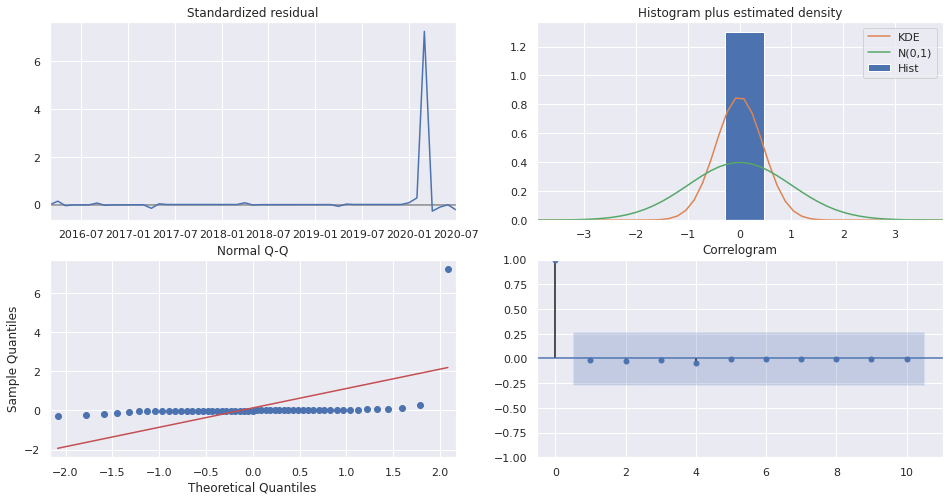

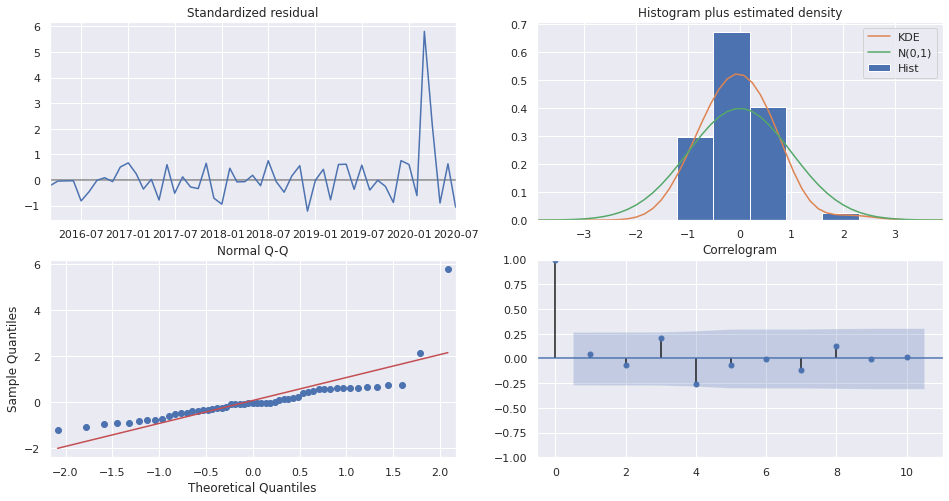

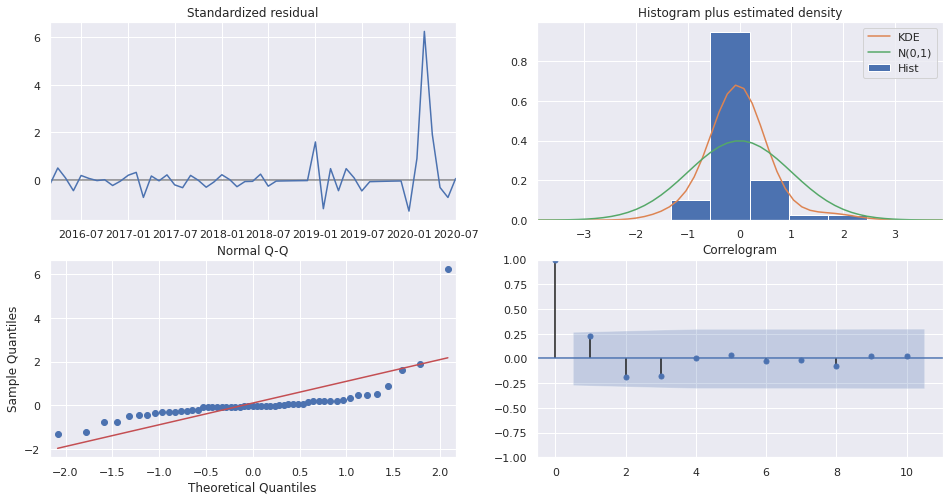

In [62]:
y = dataset.resample('MS').mean()
parametros = {
                "order": (1, 1, 1),
                "seas_order": (1, 1, 0, 12)
             }

predict_model = []
for col in y.columns:
    print(f"Training SARIMAX model ... product: {col}")
    modelo = sm.tsa.statespace.SARIMAX(y[col],
                                order=parametros["order"],
                                seasonal_order=parametros["seas_order"],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = modelo.fit()
    print(results.summary().tables[1])
    results.plot_diagnostics(figsize=(16, 8))
    predict_model.append(results)

### 12. Testando o Modelo de previsão

Para testar o nosso modelo, selecionamos uma faixa de tempo para exibir a predição. A predição do modelo está indicada em vermelho em comparação com o comportamento real (em verde). Nos gráficos a seguir, podemos ver uma tendência de alta expressiva na busca pelos produtos alcool em gel, desinfentante e água sanitária. Esse pico aconteceu durante a pandemia, o que também corroborar com os dados relacionados aos produtos mais consumidos durante a pandemia. Usar as buscas do Google para análise é uma ótima forma de manter os dados sempre atualizados, além de identificar tendências que podem ajudar os pequenos e médios negócios a sobreviver durante a crise.


#### Vamos fazer uma predição de exemplo para após de jan/2020 

Aqui você pode alterar o conteúdo da variável predicao para indicar qual ano você quer. Lembrando que, quanto mais dados você tiver, melhor será para estabelecer uma previsão de algo. Essa predição leva em conta os dados treinados anteriormente e para cada produto separadamente. O treinamento é feito para cada um dos produtos da lista selecionada, assim retornando previsões melhores para cada item da sua lista.

In [63]:
predicao_apos = '2020-01-01'

No handles with labels found to put in legend.
No handles with labels found to put in legend.


                  low      upper
date                            
2020-01-01 -25.447839  27.402224
2020-02-01 -25.178995  27.671044
2020-03-01 -24.315480  28.534539
2020-04-01   1.283656  54.133658
2020-05-01 -12.991475  39.858513
2020-06-01 -15.315929  37.534048
2020-07-01 -15.508765  37.341202


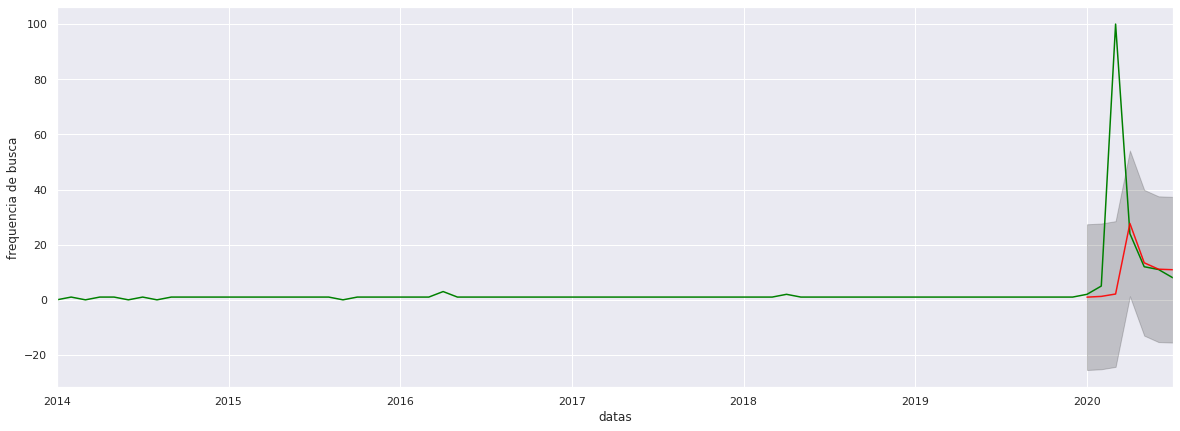

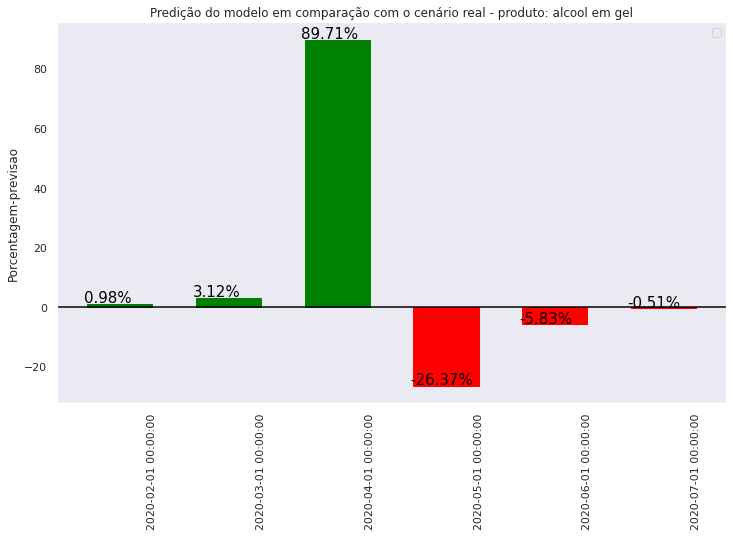

No handles with labels found to put in legend.
No handles with labels found to put in legend.


                 low      upper
date                           
2020-01-01  2.803131   7.683819
2020-02-01  4.318733   9.199420
2020-03-01  3.331171   8.211859
2020-04-01  8.898541  13.779229
2020-05-01  9.679569  14.560256
2020-06-01  7.771327  12.652014
2020-07-01  7.881189  12.761877


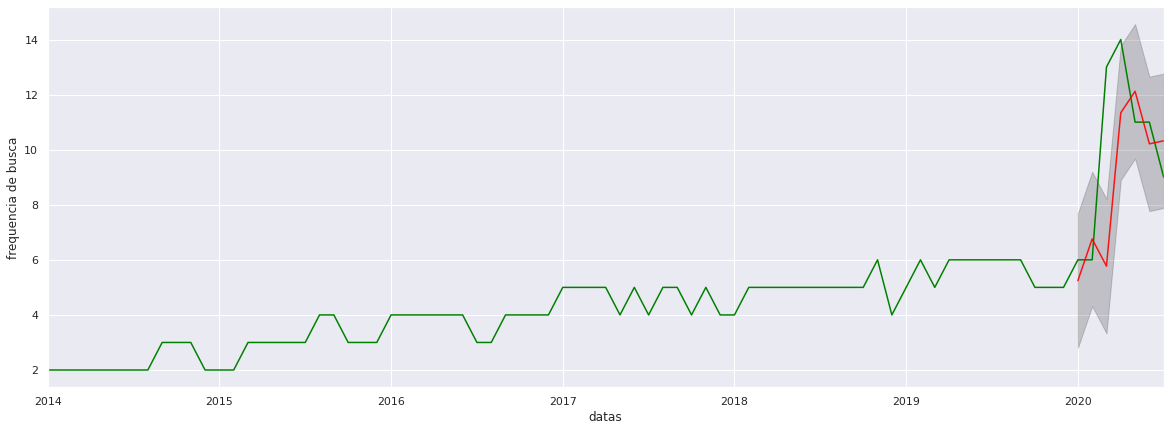

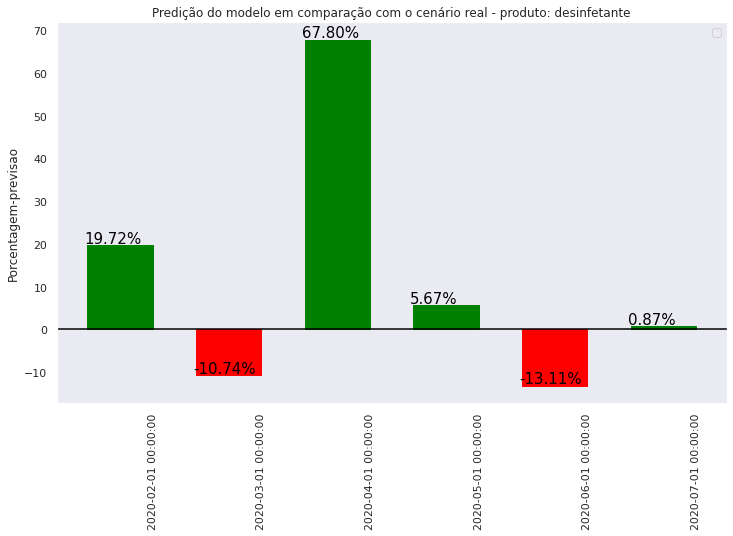

No handles with labels found to put in legend.
No handles with labels found to put in legend.


                  low      upper
date                            
2020-01-01   3.821236  11.063706
2020-02-01   0.721789   7.964258
2020-03-01   1.828745   9.071213
2020-04-01   9.854350  17.096816
2020-05-01  10.979159  18.221625
2020-06-01   8.759301  16.001767
2020-07-01   6.282810  13.525275


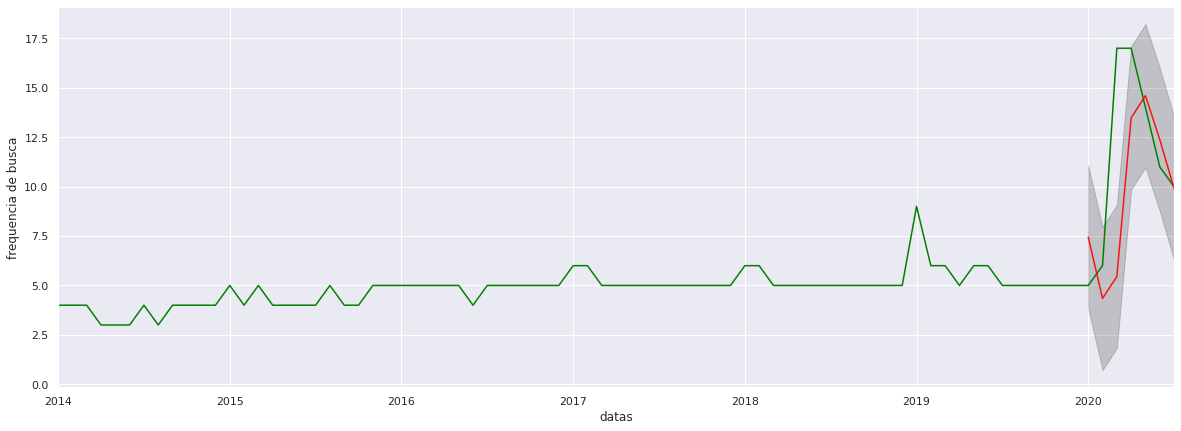

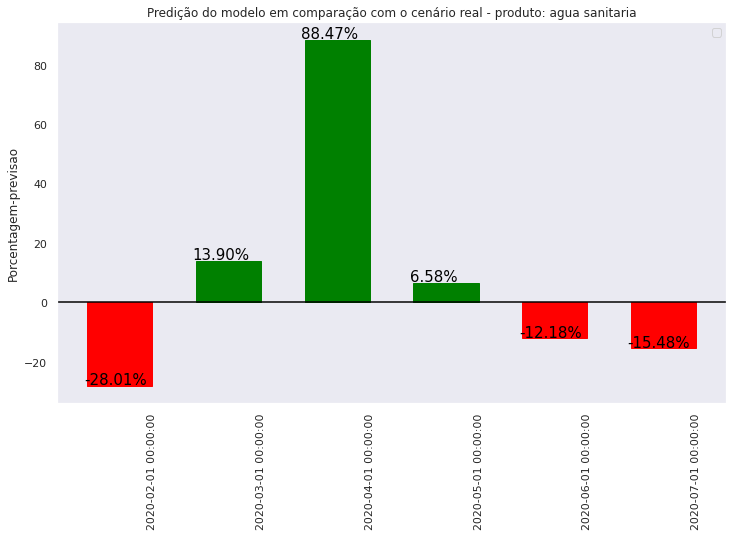

In [64]:
def bar_graph_porcent(predicao_i):
    np_array = np.array(predicao_i['upper'])
    variacao = []
    data_variacao = []
    colors_variacao = []
    for index in range(1, len(np_array)):
        mes_anterior = np_array[index - 1]
        mes_atual = np_array[index]
        data_variacao.append(predicao_i.index[index])
        porcentagem_variacao = (mes_atual - mes_anterior) * 100/ mes_anterior
        variacao.append(porcentagem_variacao)
        
        if porcentagem_variacao < 0:
            colors_variacao.append('red')
        else:
            colors_variacao.append('green')
        
    ind = np.arange(len(variacao))  
    width = 0.60
    
    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(ind - width/2, variacao, width)
    ax.axhline(y=0, color='black', linestyle='-')
    
    for i, data in zip(ax.patches, variacao):
        ax.text(i.get_x()-.03, i.get_height()+.5, "%.2f" % data + "%", fontsize=15,
                color='black')
    
    for k in range(len(colors_variacao)):
        rects1[k].set_color(colors_variacao[k])

    ax.set_ylabel('Porcentagem-previsao')
    ax.set_xticks(ind)
    ax.set_xticklabels(data_variacao, rotation=90)
    ax.legend()
    
    
for model_i, col in zip(predict_model, list_product):
    predicao_m = model_i.get_prediction(start=pd.to_datetime(predicao_apos), 
                                        dynamic=False)
    predicao_i = predicao_m.conf_int()
    
    test_model = y['2014':][col].plot(label='real', color='green')
    
    predicao_m.predicted_mean.plot(ax=test_model, color='red', 
                                   label='previsao', alpha=.9, 
                                   figsize=(20, 7))
    
    test_model.fill_between(predicao_i.index,
                            predicao_i.iloc[:, 0],
                            predicao_i.iloc[:, 1], color='k', alpha=.2)
    
    predicao_i.columns = ['low', 'upper']
    print(predicao_i)
    bar_graph_porcent(predicao_i)
    test_model.set_xlabel('datas')
    test_model.set_ylabel('frequencia de busca')
    plt.grid()
    plt.legend()
    plt.title(f"Predição do modelo em comparação com o cenário real - produto: {col}")
    plt.show()

## Google Shopping

### 1. Como os dados do Google Shopping podem ajuda-lo a entender um produto?

Para complementar nossa solução, implementamos uma ferramenta para buscar um determinado produto e extrair preços médios e avaliações dos usuários usando o Google Shopping. Com isso, essa parte ajuda o empreendedor a entender detalhes de produtos, tais como o preço médio, avaliações positivas do usuário, maior preço encontrado e maior preço encontrado.

<img src="https://www.matheusmundim.com/wp-content/uploads/2020/04/Google-Shopping-Gr%C3%A1tis.jpg">

In [65]:
import requests
from bs4 import BeautifulSoup
import re
import locale
import numpy as np
from decimal import Decimal
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


def get_busca(product_name, preco_inicial=None, preco_final=None):
    if preco_inicial and preco_final:
        url = 'https://www.google.com/search?q={}&source=lnms&tbm=shop&tbs=vw:l,mr:1,price:{},ppr_max:{}'.format(
            product_name.replace(' ', '+'), preco_inicial, preco_final)
    else:
        url = 'https://www.google.com/search?q={}&source=lnms&tbm=shop'.format(product_name.replace(' ', '+'))
    return url


def get_data_google_shopping(product_name, preco_inicial=None, preco_final=None):
    url = get_busca(product_name, preco_inicial, preco_final)
    headers = requests.utils.default_headers()
    headers.update({
            'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
                })
    
    response = requests.get(url, headers=headers, timeout=300)
    soup = BeautifulSoup(response.content, "html.parser")
    soup_precos = soup.findAll("span", {"class": "Nr22bf"})
    soup_avaliacao = soup.findAll("span", {"class": "Rv6wm"})
    
    return filter_prices(soup_precos), filter_avaliation(soup_avaliacao)

def show_plot(prices):
    x = np.arange(len(prices))
    fig, ax = plt.subplots()
    plt.bar(x, prices)
    plt.ylabel('precos')
    plt.xticks([])
    plt.title("Variação de preços do produto")
    plt.show()
                  
def media_geo(prices):
    a = np.array(prices)
    return "%.2f" % a.prod()**(1.0/len(a))

def max_value(prices):
    return np.max(np.array(prices))

def min_value(prices):
    return np.min(np.array(prices))

def filter_prices(soup_precos):
    prices_list = []
    regex = r"[>]R[$].(.*)[<]\/span"
    for p in soup_precos:
        price = re.search(regex, str(p))
        if price:
            price_product = price.groups()[0]
            price_format = price_product.replace('.', '')
            if re.search("^\d+(,\d{1,2})?$", price_format):
                prices_list.append(float(price_format.replace(',', '.')))
                
                
    return prices_list
                
    
            
def filter_avaliation(soup_avaliacao):        
    regex_aval = r"[>](.*)[<]\/span[>]"
    count_aval = 0
    count_positive = 0
    for p in soup_avaliacao:
        positive = re.search(regex_aval, str(p))
        if positive:
            positive_product = positive.groups()[0]
            count_positive += int(positive_product.replace('%', ''))
            count_aval = count_aval + 1

    if count_aval != 0:
        media_positiva = count_positive/count_aval
        return media_positiva   
    else:
        print('Nenhuma avaliação encontrada!\n')

In [66]:
preco_inicial = 10
preco_final = 30

product_name = 'Alcool em gel'

lista = get_data_google_shopping(product_name, preco_inicial, preco_final)

avaliacao_produto = [100-lista[1], lista[1]]

In [67]:
prices_df = pd.DataFrame(lista[0], columns=['precos'])
prices_df.style.background_gradient(cmap='Greens')

,precos
0,29.990000
1,22.300000
2,15.000000
3,19.990000
4,9.500000
5,15.490000
6,9.950000
7,9.900000
8,16.900000
9,7.900000


### 2. Estatística com base em avaliações dos usuários

Além da coleta dos preços dos produtos, as avaliações dos usuários também são importantes para entender melhor sobre um produto. Com isso, caso haja, as avaliações também são coletadas e armazenadas. O resultado final é uma média de todas as avaliações dos usuários coletadas sobre o produto buscado. Como esses resultados levam em conta as avaliações no Google, então os dados estão sempre em mudança, informando ao usuário todos os dados atualizados da ferramenta.

In [68]:
def avaliation_pie(lista):
    title=f"Avaliação do produto: {product_name}"
    plt.figure(figsize=(15, 6))
    plt.pie([[100-lista[1], lista[1]]], labels=['negativas', 'positivas'], 
            colors=['red', 'green'], autopct='%1.1f%%', pctdistance=0.85, shadow=True, startangle=90)
    centre_circle = plt.Circle((0,0),0.65,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal') 
    plt.tight_layout()
    plt.title(title)


****************************************************************************************************
Produto: Alcool em gel
Preço mínimo: R$ 2.56
Preço máximo: R$ 29.99
Preço médio: R$ 12.55
****************************************************************************************************


<ipython-input-68-6ead3cb376a9>:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



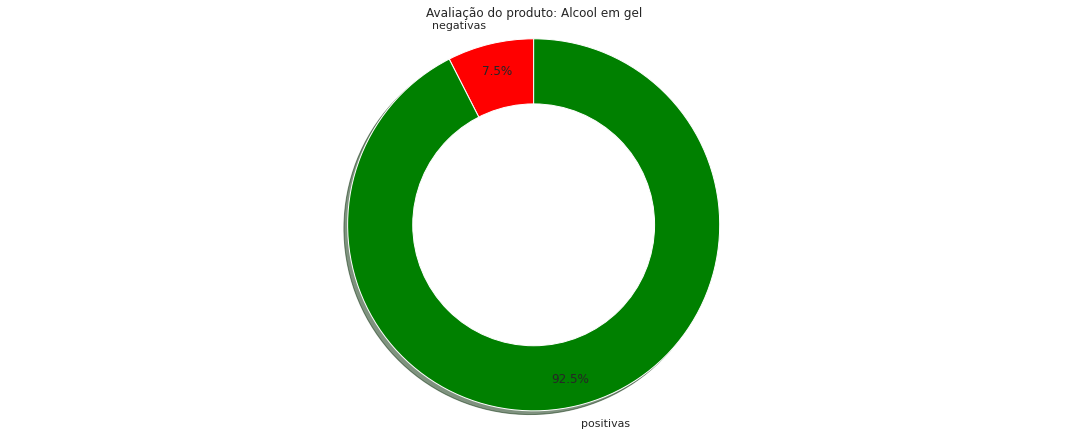

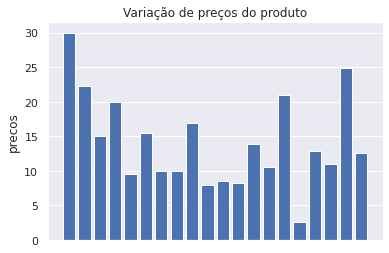

In [69]:
if len(lista) > 0:
    print("*" * 100)
    print(f"Produto: {product_name}")
    print(f"Preço mínimo: R$ {min_value(lista[0])}")
    print(f"Preço máximo: R$ {max_value(lista[0])}")
    print(f"Preço médio: R$ {media_geo(lista[0])}")
    print("*" * 100)
    avaliation_pie(lista)

    show_plot(lista[0])

A análise de dados ajuda a melhorar os processos operacionas da sua empresa. O grande diferencial da nossa solução é o fato das pequenas e médias empresas poderem sempre estar atualizadas com as novas tendências de produtos, sem mesmo terem de fato comprado o produto. Muita das vezes é realmente complicado analisar dados de algo que você ainda não tem, isso exige buscas avançadas o que pode complicar ainda mais a aplicação em seu negócio. Por isso, o objetivo dessa solução é ser simples, fornecer os dados apenas com a pesquisa por um nome de um ou mais produtos e gerar uma comparação entre eles. A solução também foca em solucionar um problema da disponibilidade de dados, ou seja, lojistas não costumam ter dados de venda completos ou busca de produtos em lojas físicas. 


## Referências

#### Dados sobre ecommerce
- https://www.ecommercebrasil.com.br/noticias/97-dos-internautas-buscam-informacoes-online/
- https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html
- https://www.ecommercebrasil.com.br/noticias/e-commerce-brasileiro-cresce-2019-compreconfie/

#### Impactos do COVID-19 na economia
- https://www1.folha.uol.com.br/mercado/2020/07/dados-mostram-a-dimensao-historica-do-impacto-da-covid-19-na-economia.shtml
- http://www.jornalcontabil.com.br/o-retorno-da-economia-impactos-nas-nossas-vidas/

#### Modelos preditivos para séries temporais
- Análise de séries temporais em epidemiologia: uma introdução sobre os aspectos metodológicos: https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1415-790X2001000300002&lng=pt
- Estudo da Influência de variáveis meteorológicas no aparecimento de casos graves de leptospirose em Salvador via modelos de séries temporais: https://teses.icict.fiocruz.br/pdf/pachecoagfm.pdf

#### Mecanismos de buscas 
- Google Trends: https://trends.google.com.br/trends/?geo=BR
- Google Shopping: https://www.google.com/


#### Ferramentas
- pandas: https://pandas.pydata.org/
- pytrends: https://matplotlib.org/
- matplotlib: https://matplotlib.org/
- statsmodels: https://www.statsmodels.org/stable/index.html
- numpy: https://numpy.org/